In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.avragg as avragg

import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import mlgrad

In [2]:
df = pd.read_csv("data/mammals.csv", sep=',')

In [3]:
df

,id,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [4]:
X = df["body"].values
Y = df["brain"].values

X = np.log(X)
Y = np.log(Y)
Xs = X.reshape(-1,1)

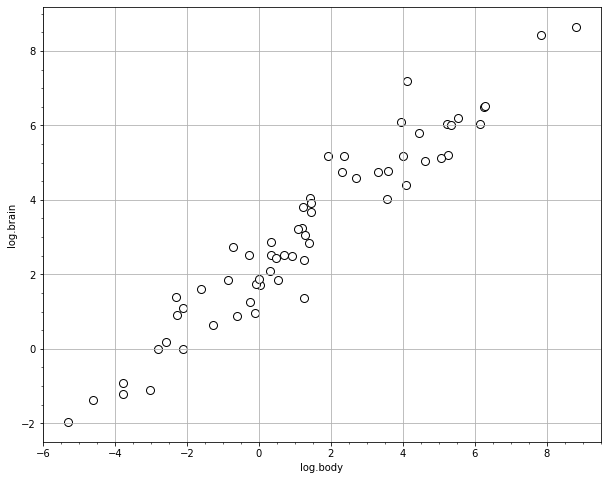

In [5]:
plt.figure(figsize=(10.0, 8.0))
plt.scatter(X, Y, s=64, c='w', edgecolors='k')
plt.xlabel('log.body')
plt.ylabel('log.brain')
plt.minorticks_on()
plt.grid(1)
#plt.loglog()
plt.show()

In [6]:
loss_func_sq = mlgrad.loss.ErrorLoss(func.Square())

K=101 param=[1.91836331 0.79319259]


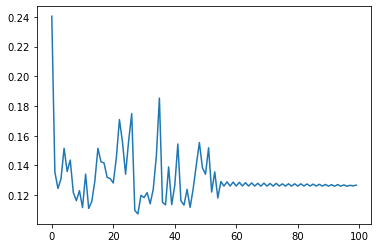

In [7]:
mod1 = mlgrad.model.LinearModel(1)
mod1.init()

er1 = mlgrad.erisk(Xs, Y,  mod1, loss_func_sq)
fg1 = mlgrad.fg(er1, h=0.001)
avg1 = mlgrad.averager_it(func.QuantileFunc(0.67, func.Sqrt(0.001)))
avg1 = avragg.WMAverage(avg1)
wt1 = mlgrad.weights.MWeights(avg1, er1)
alg1 = mlgrad.erm_irgd(fg1, wt1, verbose=1)
# print("K:", alg1.K)

plt.plot(alg1.lvals)
plt.show()

In [8]:
mod1

[0.69424321 0.77949856]
K=859 param=[2.13172318 0.75126849]


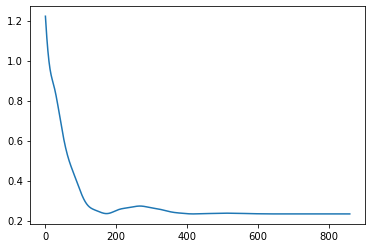

In [9]:
mod2 = mlgrad.model.LinearModel(1)
mod2.init()
print(mod2.param.base)

er2 = mlgrad.erisk(Xs, Y,  mod2, loss_func_sq)
alg2 = mlgrad.erm_fg(er2, h=0.01, tol=1.0e-8, verbose=1)
# print("K:", alg2.K)

plt.plot(alg2.lvals)
plt.show()

In [10]:
mod2

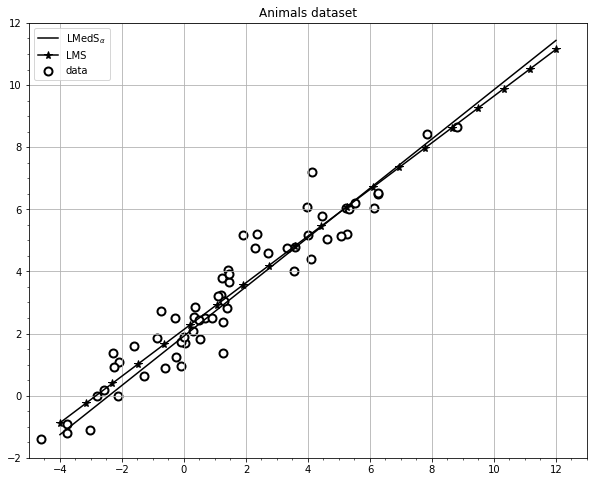

In [11]:
plt.figure(figsize=(10.0, 8.0))
plt.title('Animals dataset')
X0 = np.linspace(-4., 12., 20)
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=2., label='data')
plt.plot(X0, mod1.evaluate_all(X0.reshape(-1,1)), c='k', label=r'LMedS$_\alpha$')
plt.plot(X0, mod2.evaluate_all(X0.reshape(-1,1)), c='k', marker='*', markersize=8, label=r'LMS')
plt.minorticks_on()
plt.grid(1)
plt.legend(loc='best')
plt.xlim(-5., 13.)
plt.ylim(-2., 12.)
plt.show()

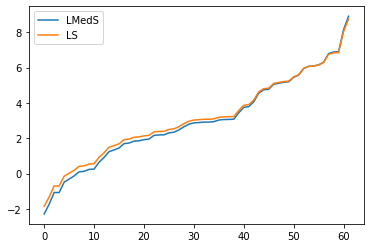

In [12]:
plt.plot(sorted(mod1.evaluate_all(Xs)), label='LMedS')
plt.plot(sorted(mod2.evaluate_all(Xs)), label='LS')
plt.legend()
plt.show()
